In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import pathlib
%matplotlib inline
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
def make_data_imbens(df):
    df_new = df.drop(['nodegree'], axis=1)
    df_new['pos74'] = (df_new['RE74'] > 0).astype(int)
    df_new['pos75'] = (df_new['RE75'] > 0).astype(int)
    return df_new

In [3]:
col_names=['treatment', 'age', 'education', 'black', 'hispanic', 'married', 'nodegree', 'RE74', 'RE75', 'RE78']

In [4]:
control=pd.read_csv(pathlib.Path.cwd().parents[0].joinpath('data', 'nswre74_control.txt'), header=None, sep=r"\s\s", names=col_names, engine='python')
treatment=pd.read_csv(pathlib.Path.cwd().parents[0].joinpath('data', 'nswre74_treated.txt'), header=None, sep=r"\s\s", names=col_names, engine='python')
psid=pd.read_csv(pathlib.Path.cwd().parents[0].joinpath('data', 'psid_controls.txt'), header=None, sep=r"\s\s", names=col_names, engine='python')

In [5]:
print(control.shape, treatment.shape, psid.shape)

(260, 10) (185, 10) (2490, 10)


In [6]:
imbens1 = pd.concat([control, treatment]).reset_index(drop=True)
imbens1.head()

,treatment,age,education,black,hispanic,married,nodegree,RE74,RE75,RE78
0,0.0,23.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,0.00
1,0.0,26.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,12383.68
2,0.0,22.0,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.00
3,0.0,18.0,9.0,1.0,0.0,0.0,1.0,0.0,0.0,10740.08
4,0.0,45.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,11796.47


In [7]:
imbens1 = make_data_imbens(imbens1)
imbens1.head()

,treatment,age,education,black,hispanic,married,RE74,RE75,RE78,pos74,pos75
0,0.0,23.0,10.0,1.0,0.0,0.0,0.0,0.0,0.00,0,0
1,0.0,26.0,12.0,0.0,0.0,0.0,0.0,0.0,12383.68,0,0
2,0.0,22.0,9.0,1.0,0.0,0.0,0.0,0.0,0.00,0,0
3,0.0,18.0,9.0,1.0,0.0,0.0,0.0,0.0,10740.08,0,0
4,0.0,45.0,11.0,1.0,0.0,0.0,0.0,0.0,11796.47,0,0


In [8]:
imbens2 = pd.concat([treatment, psid]).reset_index(drop=True)

In [9]:
imbens2 = make_data_imbens(imbens2)
imbens2.head()

,treatment,age,education,black,hispanic,married,RE74,RE75,RE78,pos74,pos75
0,1.0,37.0,11.0,1.0,0.0,1.0,0.0,0.0,9930.0460,0,0
1,1.0,22.0,9.0,0.0,1.0,0.0,0.0,0.0,3595.8940,0,0
2,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.0,24909.4500,0,0
3,1.0,27.0,11.0,1.0,0.0,0.0,0.0,0.0,7506.1460,0,0
4,1.0,33.0,8.0,1.0,0.0,0.0,0.0,0.0,289.7899,0,0


In [10]:
imbens3 = pd.concat([treatment, psid]).reset_index(drop=True)
imbens3['change_earnings'] = imbens3['RE78'] - imbens3['RE74']
imbens3 = make_data_imbens(imbens3)
imbens3 = imbens3.drop('RE78', axis=1)
imbens3.head()

,treatment,age,education,black,hispanic,married,RE74,RE75,change_earnings,pos74,pos75
0,1.0,37.0,11.0,1.0,0.0,1.0,0.0,0.0,9930.0460,0,0
1,1.0,22.0,9.0,0.0,1.0,0.0,0.0,0.0,3595.8940,0,0
2,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.0,24909.4500,0,0
3,1.0,27.0,11.0,1.0,0.0,0.0,0.0,0.0,7506.1460,0,0
4,1.0,33.0,8.0,1.0,0.0,0.0,0.0,0.0,289.7899,0,0


In [11]:
imbens4 = pd.concat([treatment, psid]).reset_index(drop=True)
imbens4 = imbens4[~((imbens4['RE74'] >= 5000) | (imbens4['RE75'] >= 5000))]
imbens4 = imbens4.reset_index(drop=True)
#Does this match imbens' number of datapoints?
imbens4.groupby('treatment').count()
#yes!

,age,education,black,hispanic,married,nodegree,RE74,RE75,RE78
treatment,,,,,,,,,
0.0,242,242,242,242,242,242,242,242,242
1.0,148,148,148,148,148,148,148,148,148


In [12]:
imbens4 = make_data_imbens(imbens4)
imbens4.head()

,treatment,age,education,black,hispanic,married,RE74,RE75,RE78,pos74,pos75
0,1.0,37.0,11.0,1.0,0.0,1.0,0.0,0.0,9930.0460,0,0
1,1.0,22.0,9.0,0.0,1.0,0.0,0.0,0.0,3595.8940,0,0
2,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.0,24909.4500,0,0
3,1.0,27.0,11.0,1.0,0.0,0.0,0.0,0.0,7506.1460,0,0
4,1.0,33.0,8.0,1.0,0.0,0.0,0.0,0.0,289.7899,0,0


In [13]:
def plot_treatment_graphs(df, name, outcome_col):
    print(ggplot(df, aes(x = 'factor(treatment)', fill = 'factor(treatment)')) + geom_bar() + theme_light() + labs(title = name) + theme(figure_size = (3,3)))
    print(ggplot(df, aes(x = 'factor(treatment)', y = 'age', fill = 'factor(treatment)')) + geom_boxplot() + labs(title = name) + theme_light() + theme(figure_size = (3,3)))
    print(ggplot(df, aes(x = 'factor(treatment)', y = 'education', fill = 'factor(treatment)')) + geom_boxplot() + theme_light() + labs(title = name) + theme(figure_size = (3,3)))
    print(ggplot(df, aes(x = 'factor(treatment)', y = 'RE74', fill = 'factor(treatment)')) + labs(title = name) + geom_boxplot() + theme_light() + theme(figure_size = (3,3)))
    print(ggplot(df, aes(x = 'factor(treatment)', y = 'RE75', fill = 'factor(treatment)')) + labs(title = name) + geom_boxplot() + theme_light() + theme(figure_size = (3,3)))
    print(ggplot(df, aes(x = 'factor(treatment)', y = outcome_col, fill = 'factor(treatment)')) + labs(title = name) + geom_boxplot() + scale_y_continuous() + theme_light() + theme(figure_size = (3,3)))
    print(ggplot(df, aes(x = 'factor(treatment)', y = 'factor(black)', fill = 'factor(black)')) + geom_jitter() + labs(title = name) + theme_light() + theme(figure_size = (3,3)))
    print(ggplot(df, aes(x = 'factor(treatment)', y = 'factor(hispanic)', fill = 'factor(hispanic)')) + geom_jitter() + labs(title = name) + theme_light() + theme(figure_size = (3,3)))
    print(ggplot(df, aes(x = 'factor(treatment)', y = 'factor(married)', fill = 'factor(married)')) + geom_jitter() + labs(title = name) + theme_light() + theme(figure_size = (3,3)))

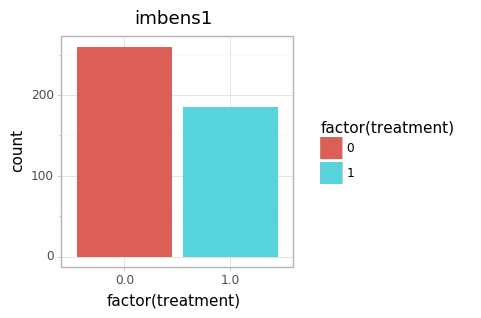

<ggplot: (95414518753)>


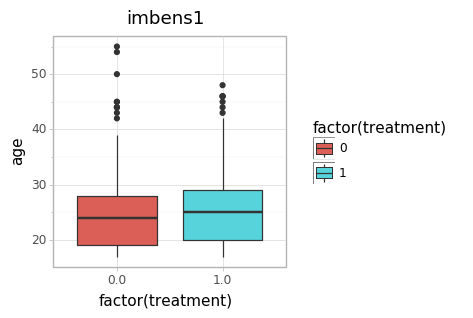

<ggplot: (95414435718)>


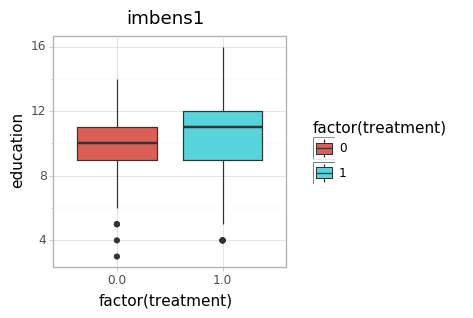

<ggplot: (95414436907)>


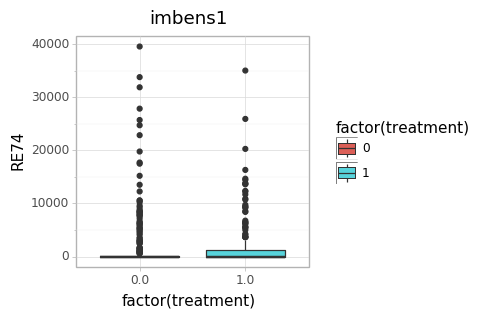

<ggplot: (95415015281)>


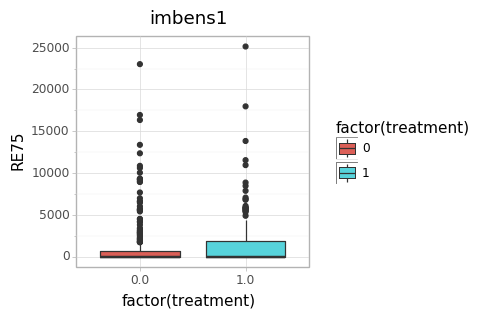

<ggplot: (-9223371941438687463)>


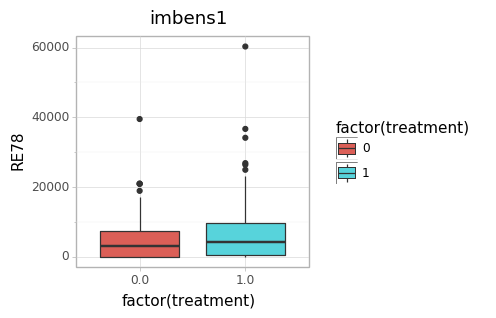

<ggplot: (-9223371941438649326)>


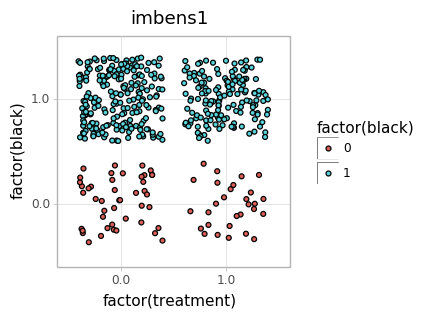

<ggplot: (-9223371941438608296)>


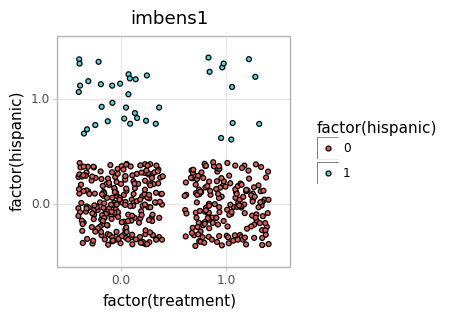

<ggplot: (95416196521)>


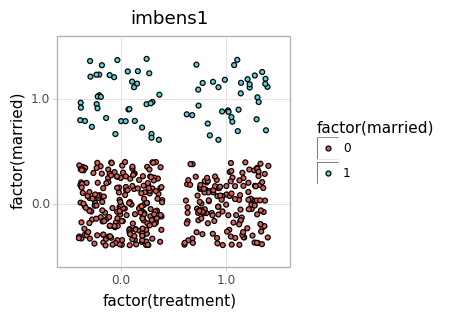

<ggplot: (-9223371941438608149)>


In [14]:
plot_treatment_graphs(imbens1, 'imbens1', 'RE78')

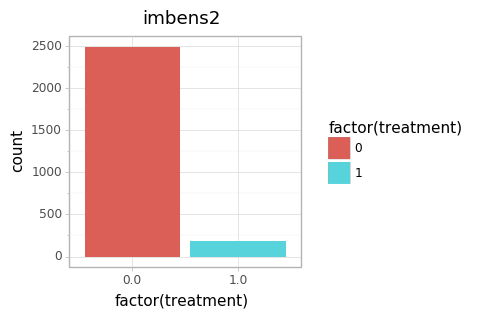

<ggplot: (-9223371941439760661)>


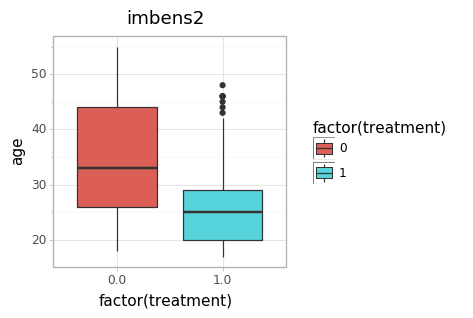

<ggplot: (-9223371941438506296)>


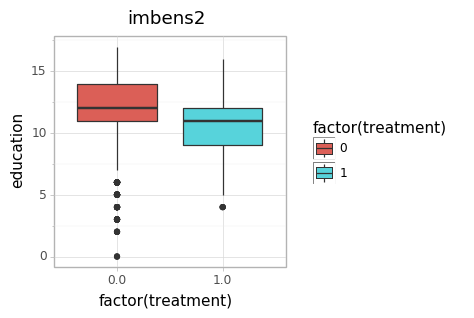

<ggplot: (-9223371941438686958)>


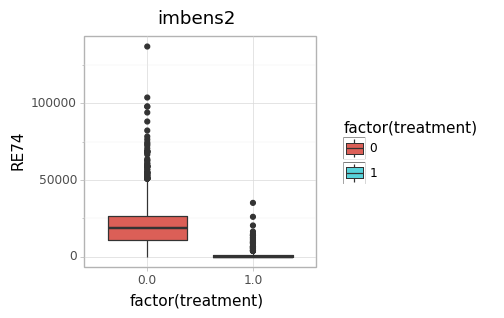

<ggplot: (95416337258)>


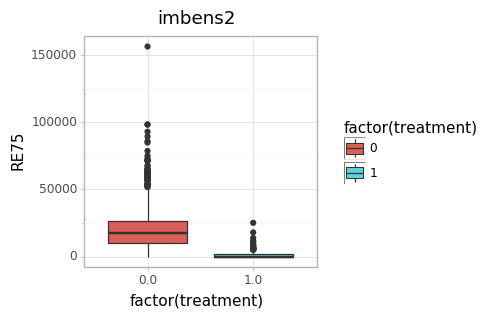

<ggplot: (-9223371941438555795)>


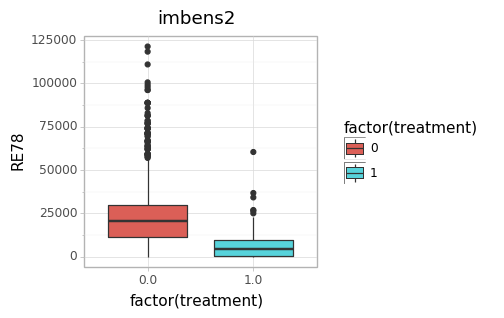

<ggplot: (95416154986)>


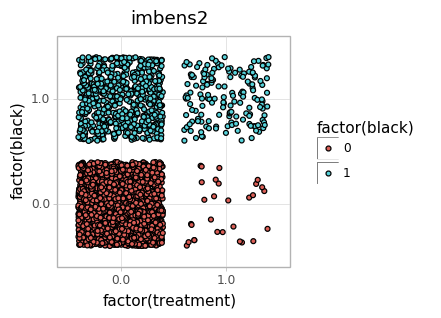

<ggplot: (95414949945)>


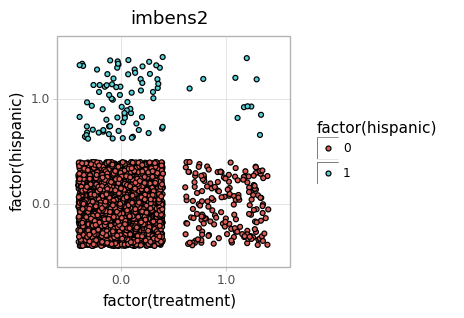

<ggplot: (95416259718)>


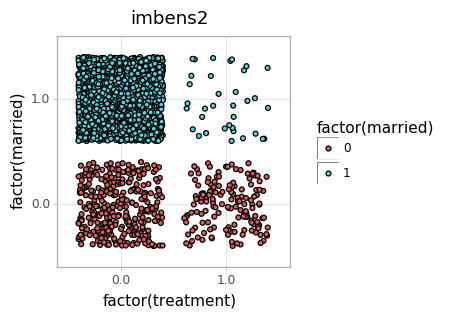

<ggplot: (-9223371941438626430)>


In [15]:
plot_treatment_graphs(imbens2, 'imbens2', 'RE78')

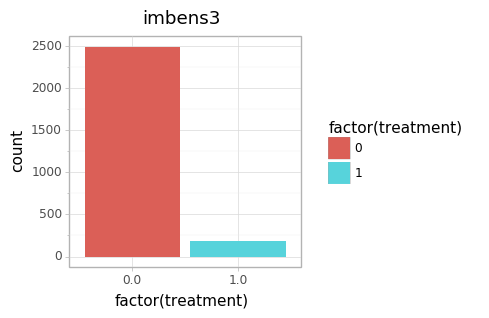

<ggplot: (-9223371941438626381)>


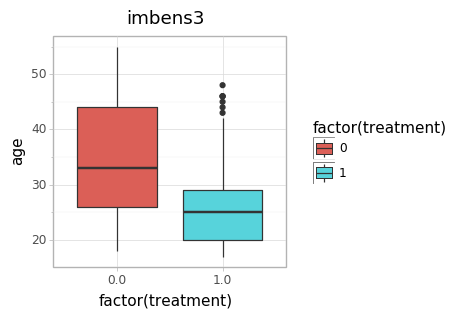

<ggplot: (95415017599)>


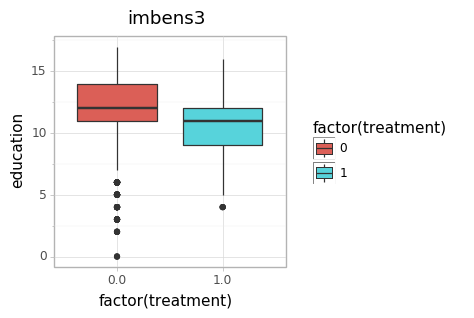

<ggplot: (-9223371941438588598)>


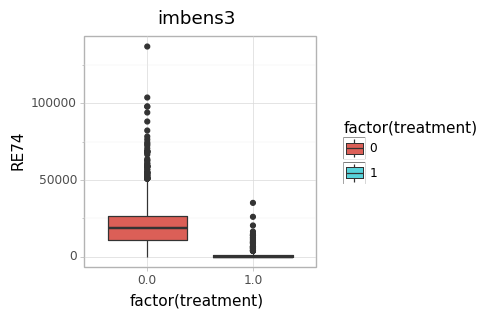

<ggplot: (-9223371941439751224)>


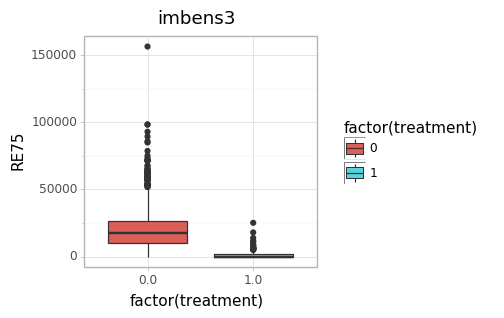

<ggplot: (-9223371941439786706)>


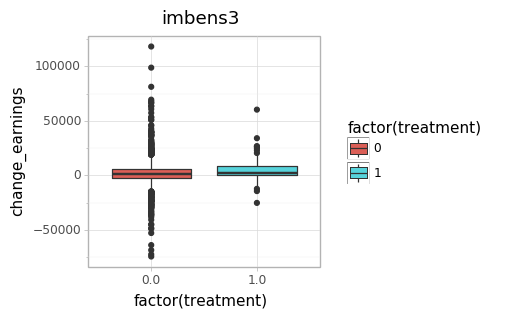

<ggplot: (-9223371941438514067)>


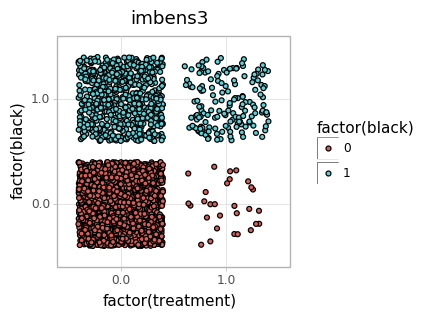

<ggplot: (-9223371941438351174)>


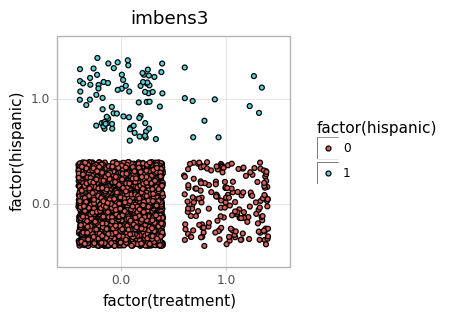

<ggplot: (-9223371941438321618)>


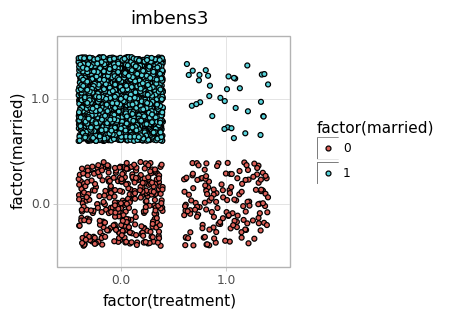

<ggplot: (-9223371941438588584)>


In [16]:
plot_treatment_graphs(imbens3, 'imbens3', 'change_earnings')

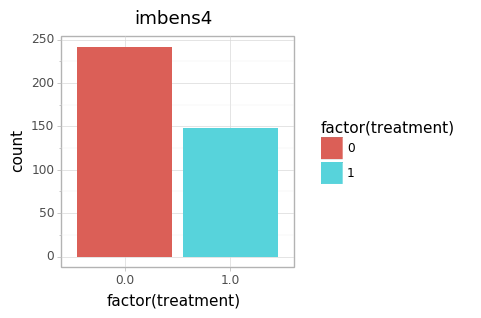

<ggplot: (-9223371941438588465)>


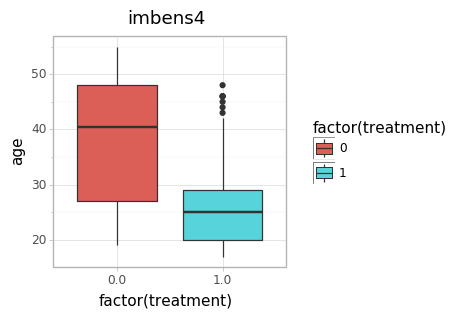

<ggplot: (-9223371941438649961)>


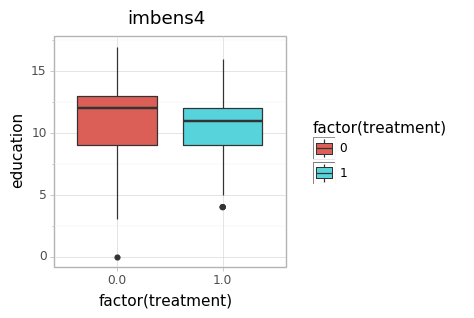

<ggplot: (95414503432)>


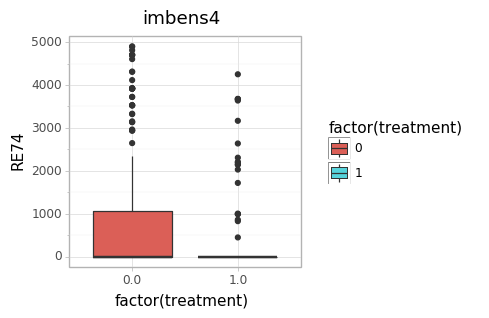

<ggplot: (95416424000)>


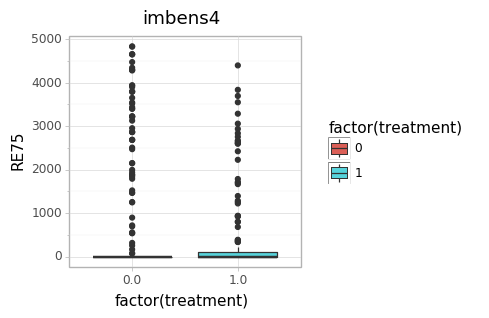

<ggplot: (95416192127)>


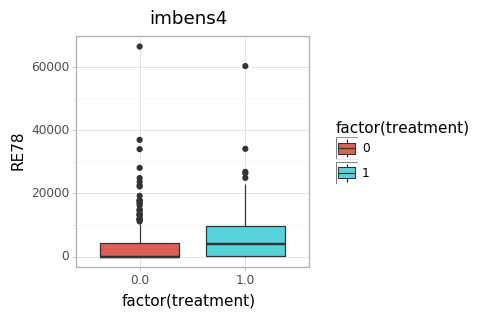

<ggplot: (-9223371941438356655)>


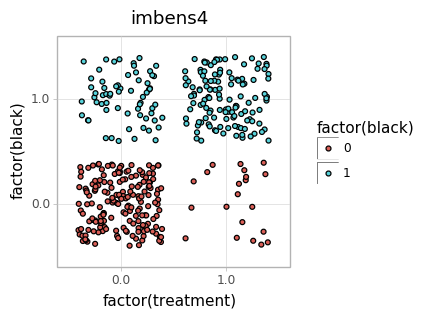

<ggplot: (95414950036)>


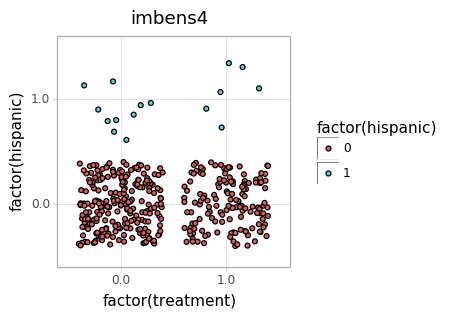

<ggplot: (95416126433)>


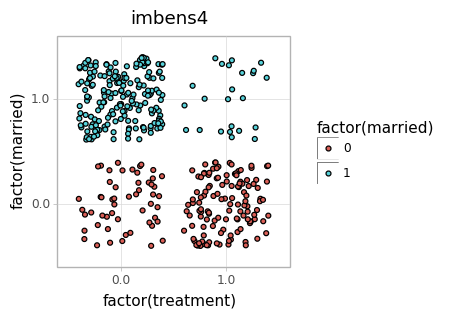

<ggplot: (-9223371941440345919)>


In [17]:
plot_treatment_graphs(imbens4, 'imbens4', 'RE78')

In [20]:
def plot_outcome_graphs(df, name, outcome_col):
    print(ggplot(df, aes(x='factor(black)', y=outcome_col, fill='factor(black)'))+geom_boxplot()+labs(title=name)+facet_wrap('~treatment')+theme_light()+theme(figure_size=(3,3)))
    print(ggplot(df, aes(x='factor(hispanic)', y=outcome_col, fill='factor(hispanic)'))+geom_boxplot()+labs(title=name)+facet_wrap('~treatment')+theme_light()+theme(figure_size=(3,3)))
    print(ggplot(df, aes(x='factor(married)', y=outcome_col, fill='factor(married)'))+geom_boxplot()+labs(title=name)+facet_wrap('~treatment')+theme_light()+theme(figure_size=(3,3)))
    print(ggplot(df, aes(x='age', y=outcome_col, fill='factor(treatment)'))+labs(title=name)+geom_point()+theme_light()+theme(figure_size=(3,3)))
    print(ggplot(df, aes(x='RE74', y=outcome_col, fill='factor(treatment)'))+labs(title=name)+geom_point()+theme_light()+theme(figure_size=(3,3)))
    print(ggplot(df, aes(x='RE75', y=outcome_col, fill='factor(treatment)'))+labs(title=name)+geom_point()+theme_light()+theme(figure_size=(3,3)))

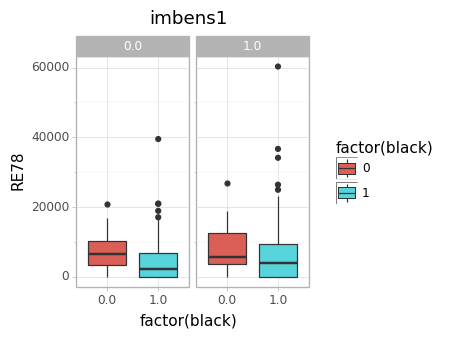

<ggplot: (-9223371941438311108)>


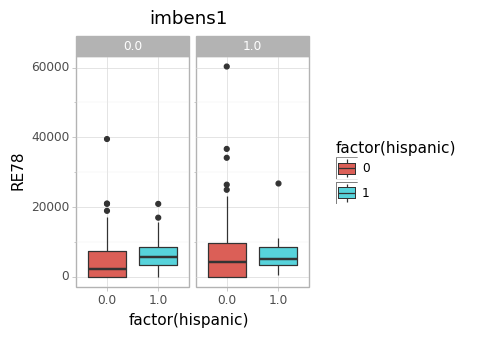

<ggplot: (95417569905)>


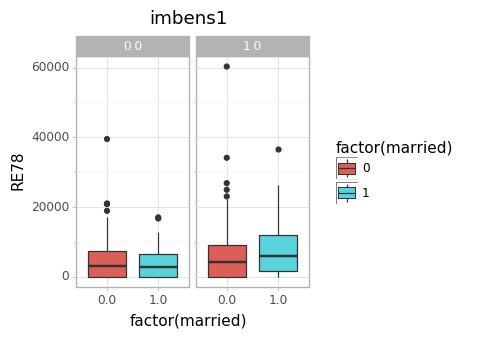

<ggplot: (95416384043)>


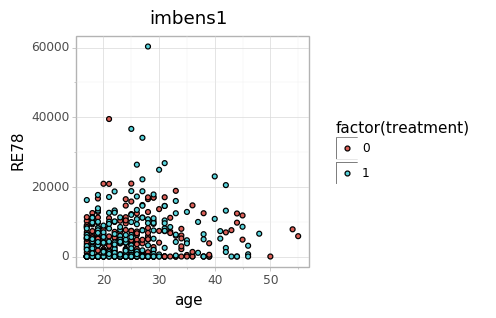

<ggplot: (-9223371941437210389)>


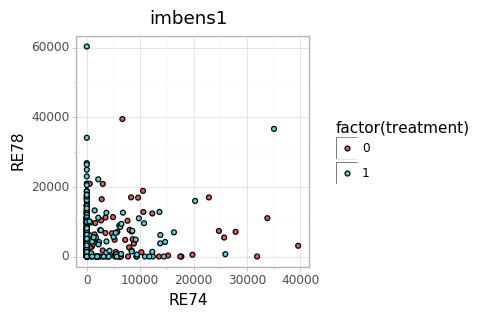

<ggplot: (-9223371941438610158)>


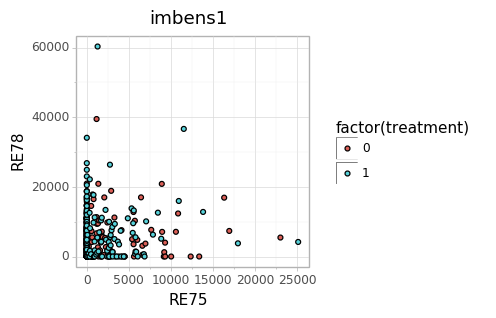

<ggplot: (95416229752)>


In [21]:
plot_outcome_graphs(imbens1, 'imbens1', 'RE78')

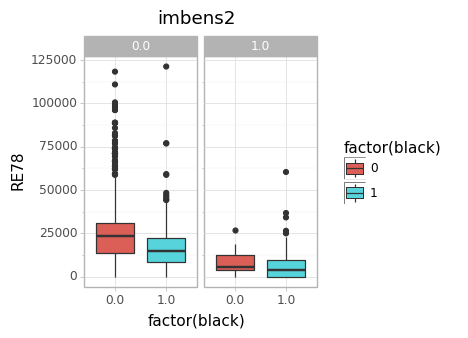

<ggplot: (-9223371941438630512)>


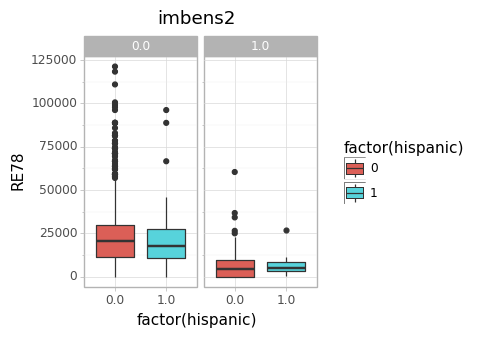

<ggplot: (95416201364)>


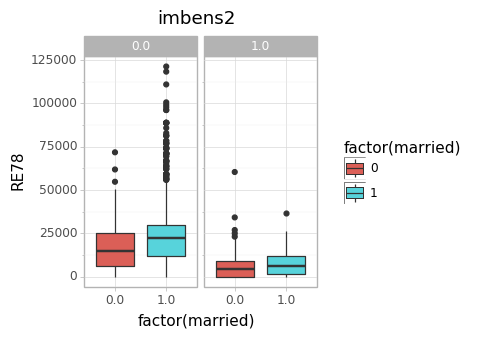

<ggplot: (95416447401)>


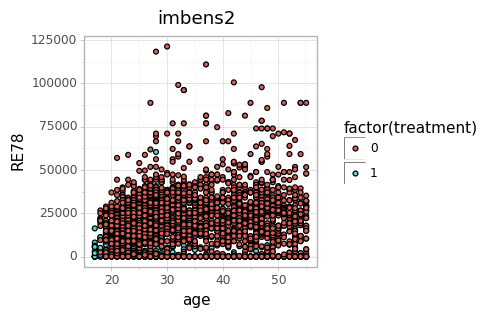

<ggplot: (95416092108)>


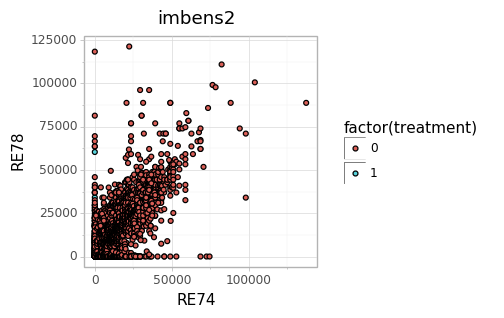

<ggplot: (95414981075)>


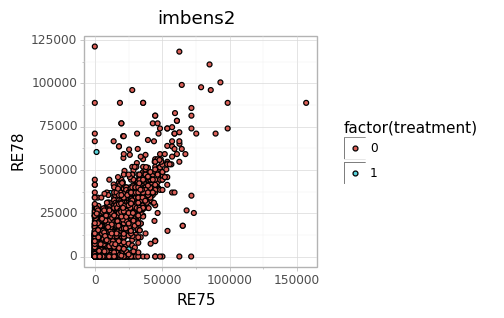

<ggplot: (-9223371941438583559)>


In [22]:
plot_outcome_graphs(imbens2, 'imbens2', 'RE78')

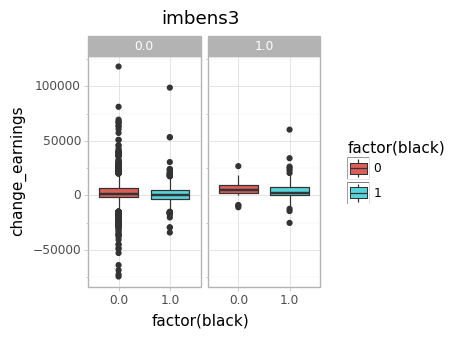

<ggplot: (-9223371941439797262)>


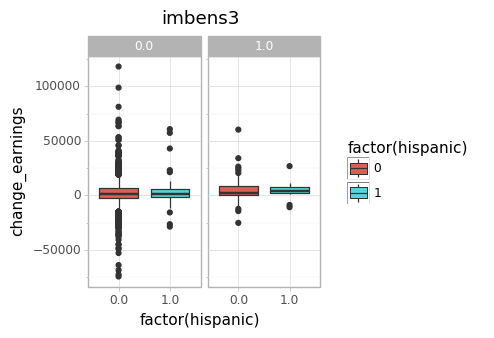

<ggplot: (95416231025)>


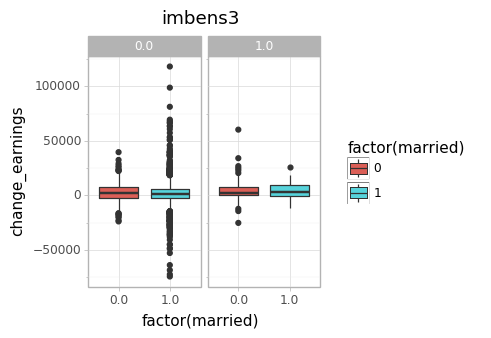

<ggplot: (95417709695)>


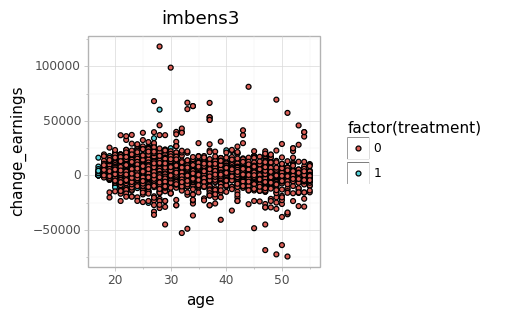

<ggplot: (-9223371941437008573)>


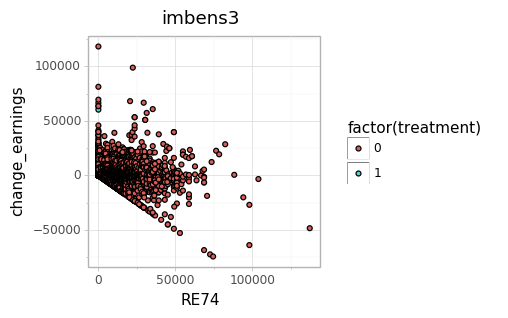

<ggplot: (-9223371941436991151)>


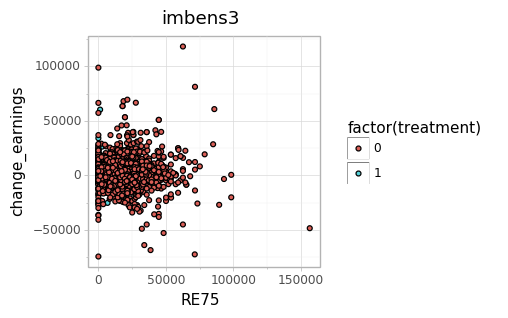

<ggplot: (95417767190)>


In [23]:
plot_outcome_graphs(imbens3, 'imbens3', 'change_earnings')

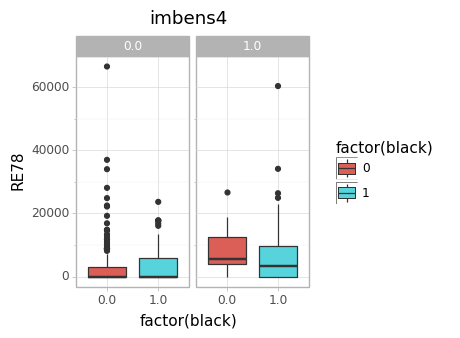

<ggplot: (-9223371941436990215)>


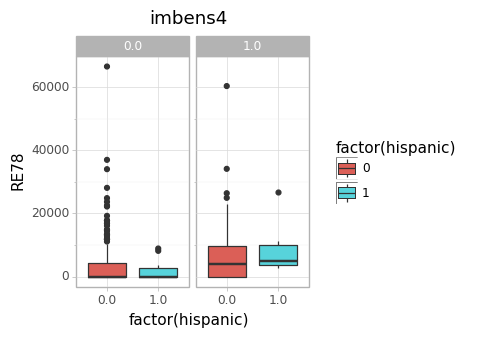

<ggplot: (-9223371941436789900)>


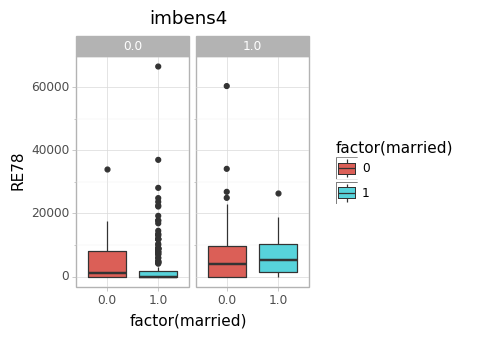

<ggplot: (-9223371941437064956)>


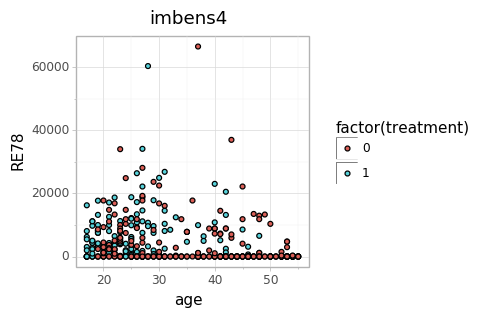

<ggplot: (-9223371941438630624)>


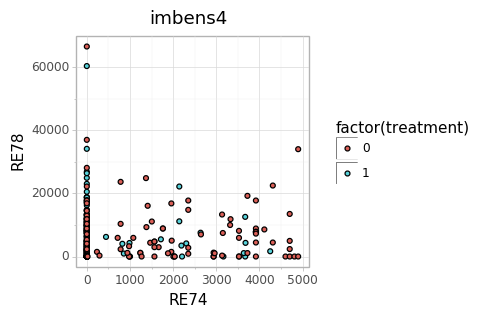

<ggplot: (-9223371941438317645)>


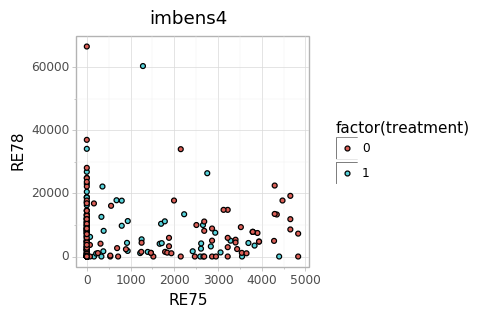

<ggplot: (95414981012)>


In [24]:
plot_outcome_graphs(imbens4, 'imbens4', 'RE78')